### Hidden Markov Models for Speech Recognition

In [1]:
from scipy.io import wavfile

In [2]:
samplerate, apple_audio = wavfile.read('sounds/apple/apple01.wav')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

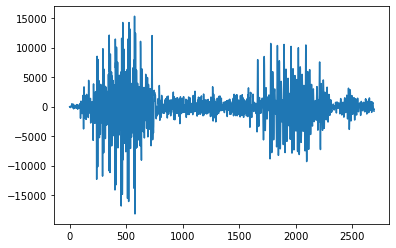

In [4]:
plt.plot(apple_audio)

In [5]:
samplerate, banana = wavfile.read('sounds/banana/banana01.wav')

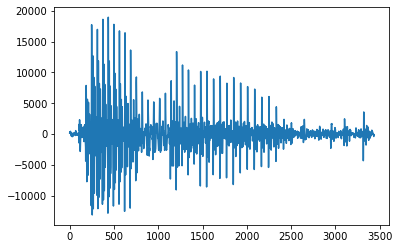

In [6]:
plt.plot(banana)

In [8]:
#!pip install python-speech-features


In [9]:
from python_speech_features import mfcc

In [10]:
mfcc_features = mfcc(banana)

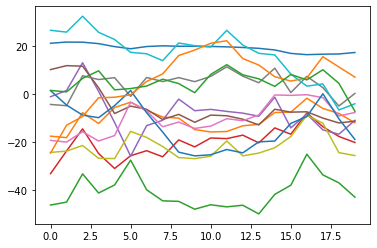

In [12]:
plt.plot(mfcc_features);

### Getting the Model --> `hmmlearn`

In [18]:
import pandas_datareader as pdr

In [19]:
btc = pdr.get_data_yahoo('BTC-USD')

In [17]:
from hmmlearn import hmm

In [20]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-18,425.996002,415.638000,416.571991,422.372986,76752600.0,422.372986
2016-02-19,423.104004,417.604004,422.730011,420.785004,55711300.0,420.785004
2016-02-20,441.984009,421.601013,421.601013,437.164001,93992096.0,437.164001
2016-02-21,448.045990,429.076996,437.773010,438.798004,89820704.0,438.798004
2016-02-22,439.045013,432.916992,438.989014,437.747986,85385200.0,437.747986


<AxesSubplot:xlabel='Date'>

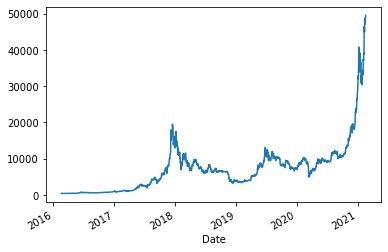

In [21]:
btc['Adj Close'].plot()

In [35]:
model = hmm.GaussianHMM(2)

In [36]:
model.fit(btc[['Adj Close']])

GaussianHMM(n_components=2)

In [37]:
preds = model.predict(btc[['Adj Close']])

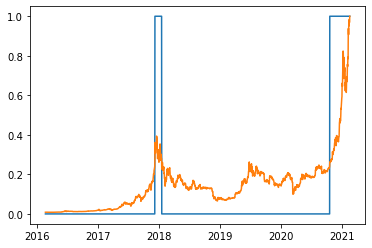

In [39]:
plt.plot(btc.index, preds)
plt.plot((btc['Adj Close'])/(btc['Adj Close'].max()))

In [40]:
model.score(btc[['Adj Close']])

-17729.820117304404

### Write a class to Model

In [41]:
class MakeMarkov:
    
    def __init__(self, n_components = 3, n_iter = 1000):
        self.n_components = n_components
        self.n_iter = n_iter
        self.model = hmm.GaussianHMM(n_components=self.n_components,
                                    n_iter = self.n_iter)
        
    def train(self, X):
        self.fit_model = self.model.fit(X)
        return self.fit_model
    
    def score(self, X):
        return self.model.score(X)

In [42]:
import os

In [45]:
os.listdir('sounds/')

['apple', 'kiwi', 'lime', 'banana', 'pineapple', 'orange', 'peach']

In [46]:
apple_files = os.listdir('sounds/apple/')

In [47]:
apple_files

['apple07.wav',
 'apple13.wav',
 'apple12.wav',
 'apple06.wav',
 'apple10.wav',
 'apple04.wav',
 'apple05.wav',
 'apple11.wav',
 'apple15.wav',
 'apple01.wav',
 'apple14.wav',
 'apple02.wav',
 'apple03.wav',
 'apple08.wav',
 'apple09.wav']

In [51]:
fruits = os.listdir('sounds/')

In [52]:
fruits

['apple', 'kiwi', 'lime', 'banana', 'pineapple', 'orange', 'peach']

In [62]:
models = []
for fruit in fruits:
    files = os.listdir('sounds/' + fruit + '/')
    for file in files[:-1]:
        samplerate, apple_audio = wavfile.read('sounds/' + fruit + '/' + file)
        features = mfcc(apple_audio)
        hmm_trainer = MakeMarkov()
        hmm_trainer.train(features)
        models.append((hmm_trainer, fruit))
    

In [65]:
_, test_apple = wavfile.read('sounds/apple/apple15.wav')
_, test_pineapple = wavfile.read('sounds/pineapple/pineapple15.wav')
_, test_kiwi = wavfile.read('sounds/kiwi/kiwi15.wav')

In [66]:
test_apple_features = mfcc(test_apple)

In [69]:
scores = [model[0].score(test_apple_features) for model in models]

In [70]:
np.argmax(scores)

8

In [71]:
models[8][1]

'apple'

In [72]:
def find_sound(wav):
    features = mfcc(wav)
    scores = [model[0].score(features) for model in models]
    ans_idx = np.argmax(scores)
    return models[ans_idx][1]

In [73]:
find_sound(test_pineapple)

'pineapple'

In [74]:
find_sound(test_kiwi)

'kiwi'